In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
#load csv
df = pd.read_csv('CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df = df.drop(columns=['customerID'])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
print(df['gender'].unique())
print(df['Partner'].unique())
print(df['Dependents'].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']


In [10]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df:
  if col not in numerical_features:
    print(col, df[col].unique())
    print(" "*50)

gender ['Female' 'Male']
                                                  
SeniorCitizen [0 1]
                                                  
Partner ['Yes' 'No']
                                                  
Dependents ['No' 'Yes']
                                                  
PhoneService ['No' 'Yes']
                                                  
MultipleLines ['No phone service' 'No' 'Yes']
                                                  
InternetService ['DSL' 'Fiber optic' 'No']
                                                  
OnlineSecurity ['No' 'Yes' 'No internet service']
                                                  
OnlineBackup ['Yes' 'No' 'No internet service']
                                                  
DeviceProtection ['No' 'Yes' 'No internet service']
                                                  
TechSupport ['No' 'Yes' 'No internet service']
                                                  
StreamingTV ['No' 'Yes' 'No internet 

In [11]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df['TotalCharges']= df['TotalCharges'].replace({" ": '0.0'})
df['TotalCharges']= df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
#checking class distribution of target column
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


INSIGHTS
- removed customerId
- No missing values in dataset
- missing values in Total Charges replaced with 0.0
- class imabalance identified in target

In [14]:
#exploratory data analysis

df.shape

(7043, 20)

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(10,5))
  sns.histplot(data=df, x=column_name, kde=True)
  plt.title(f'Distribution of {column_name}')

  col_mean = df[column_name].mean()
  col_median = df[column_name].median()
  col_std = df[column_name].std()

  plt.axvline(col_mean, color='red', linestyle='dashed', label='mean')
  plt.axvline(col_median, color='blue', linestyle='-', label='median')

  plt.legend()

  plt.show()


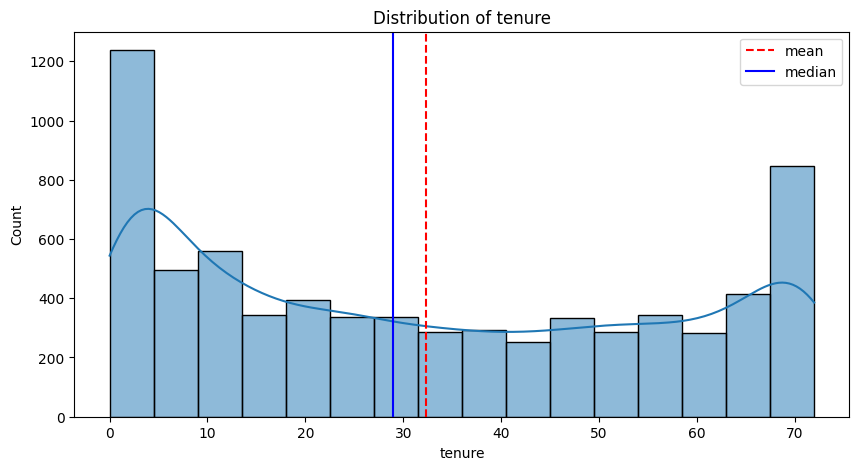

In [19]:
plot_histogram(df,'tenure')

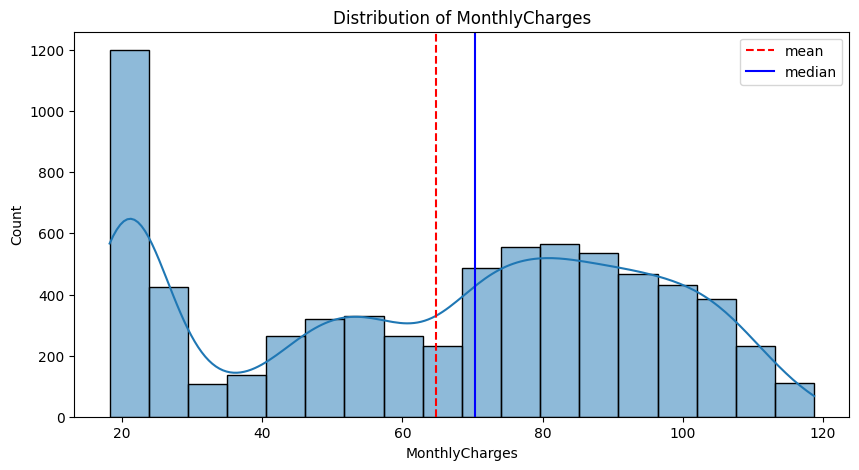

In [20]:
plot_histogram(df,'MonthlyCharges')

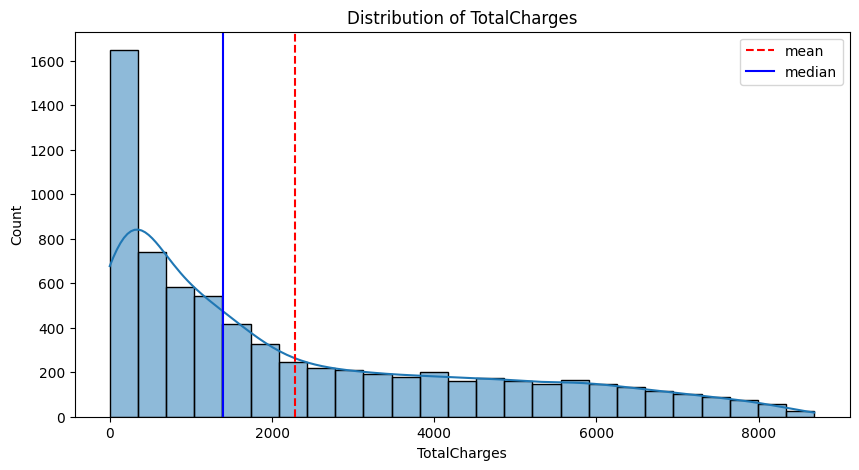

In [21]:
plot_histogram(df,'TotalCharges')

In [22]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(10,5))
  sns.boxplot(y=df[column_name])
  plt.title(f'Boxplot of {column_name}')

  plt.ylabel(column_name)
  plt.show()

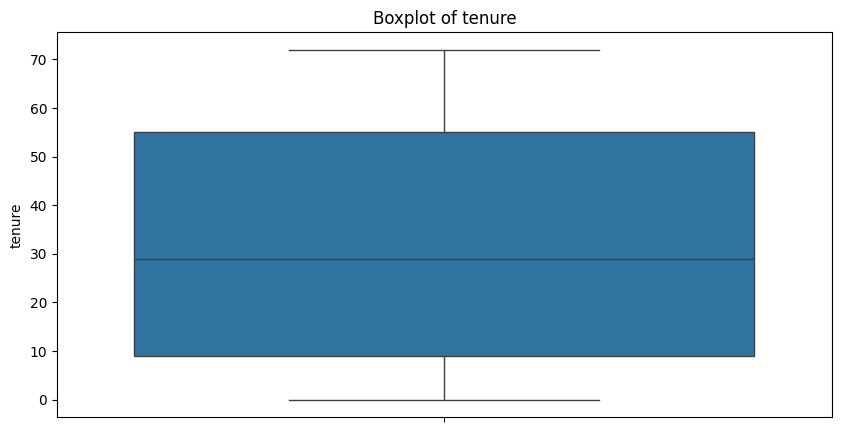

In [23]:
plot_boxplot(df,'tenure')

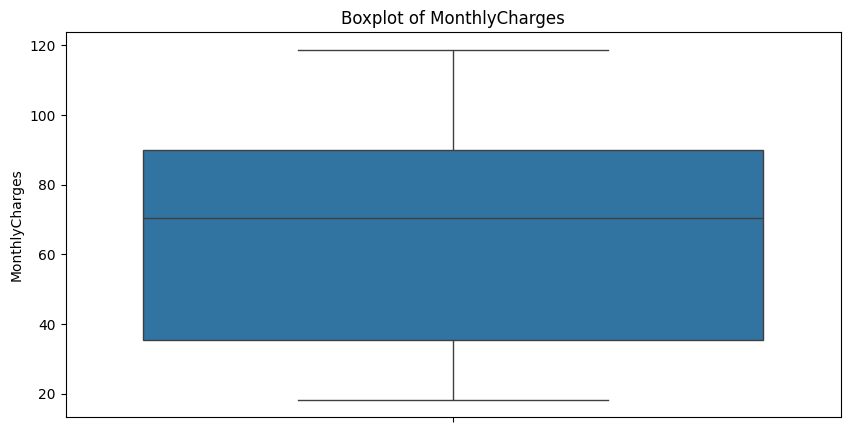

In [24]:
plot_boxplot(df,'MonthlyCharges')

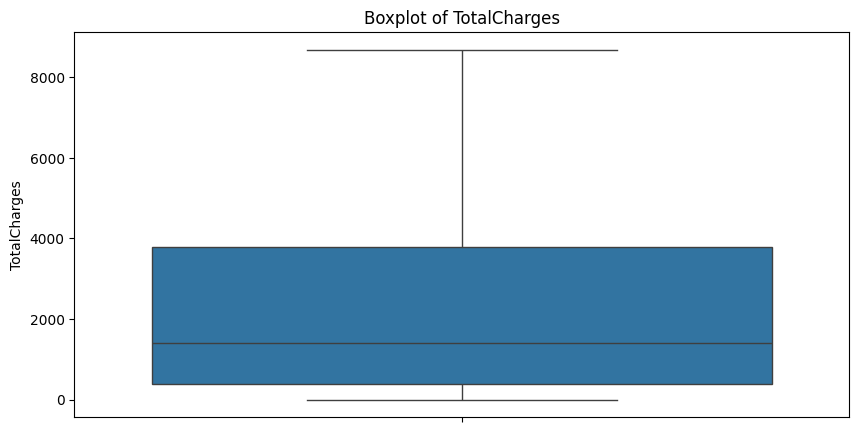

In [25]:
plot_boxplot(df,'TotalCharges')

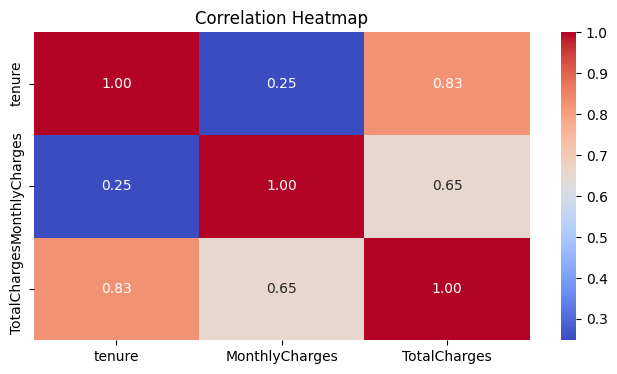

In [26]:
#correlation heatmap for numerical columns
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure','MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Categorical Features Analysis

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [29]:
object_columns=df.select_dtypes(include='object').columns.to_list()
object_columns=['SeniorCitizen']+object_columns
object_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

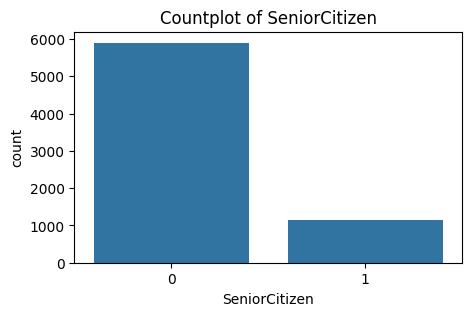

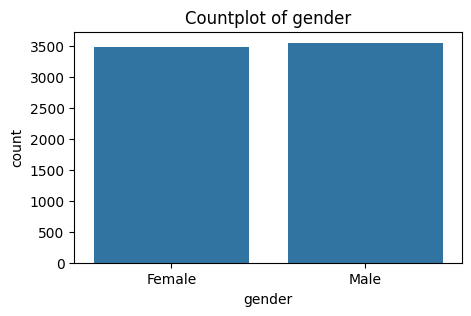

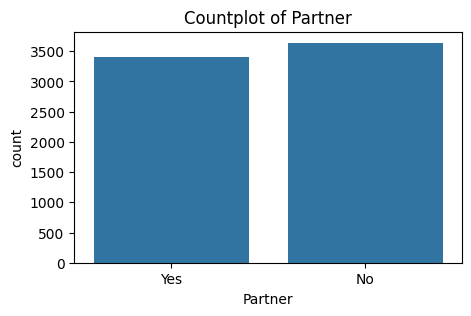

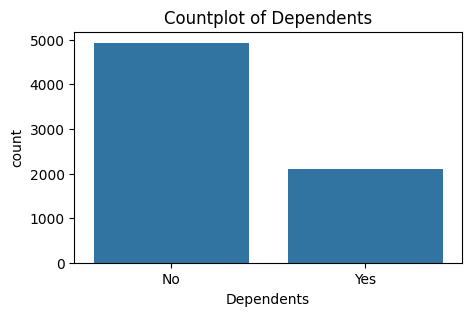

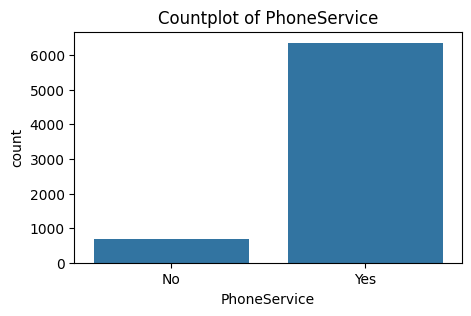

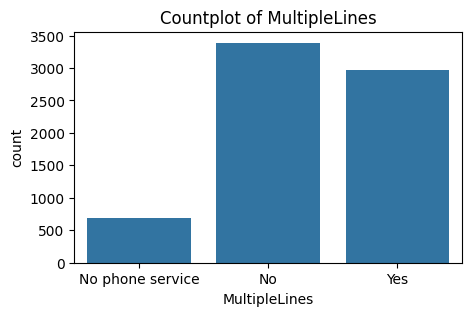

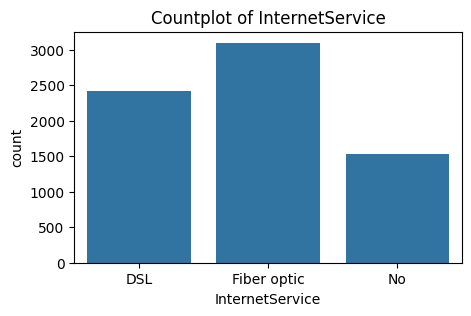

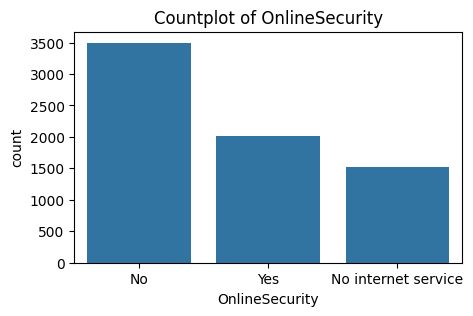

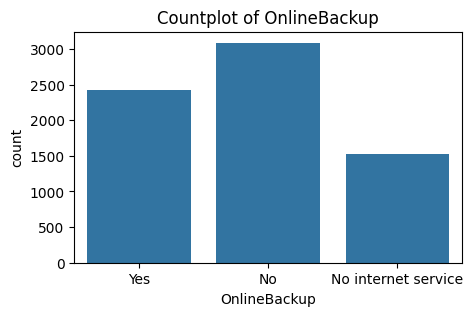

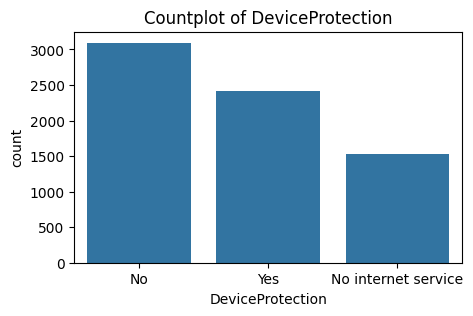

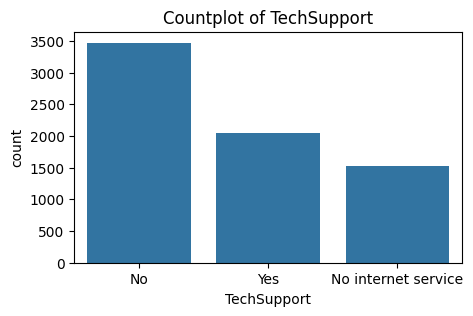

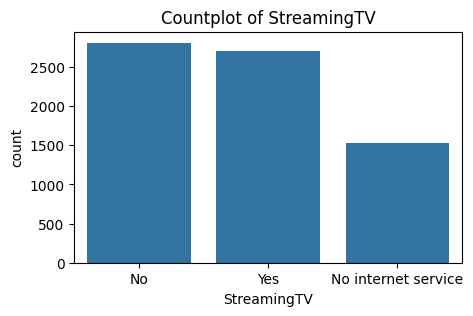

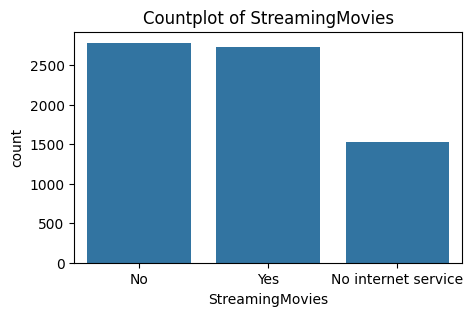

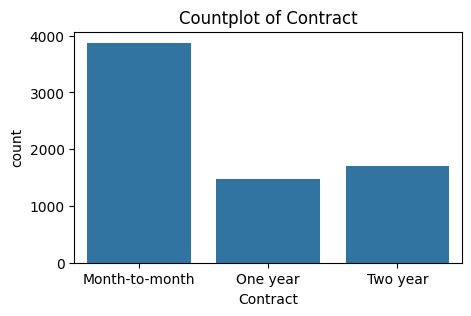

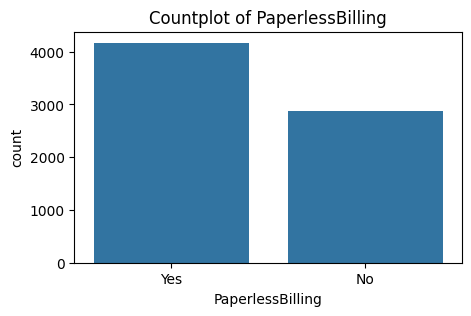

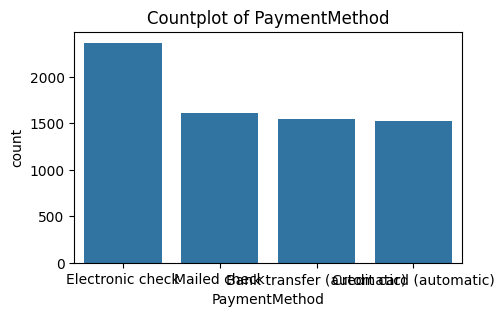

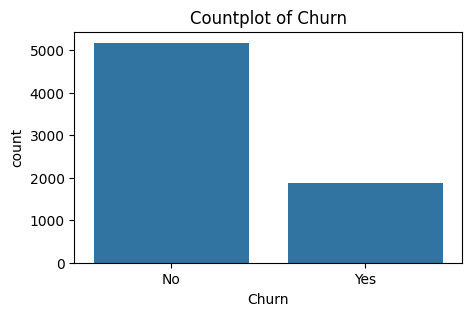

In [30]:
#Countplot for categorical columns
for col in object_columns:
  plt.figure(figsize=(5,3))
  sns.countplot(data=df, x=col)
  plt.title(f'Countplot of {col}')
  plt.show()

Data Preprocessing

In [31]:
#label encoding of target column
df['Churn']= df['Churn'].replace({'Yes':1, 'No':0})

C:\Users\Rafa Inamdar\AppData\Local\Temp\ipykernel_18012\2646954769.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']= df['Churn'].replace({'Yes':1, 'No':0})


In [32]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [33]:
#identifying categorical features in a list
object_columns=df.select_dtypes(include='object').columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [34]:
#label encoding of categorical features
encoders={}

for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]= label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders,f)

In [35]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [36]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


Split Training and Test data

In [37]:
#splitting features and target
x=df.drop(columns=['Churn'])
y=df['Churn']

In [38]:
#split training and testing data
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
print(y_train.shape)

(5634,)


In [40]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling Technique

In [41]:
smote=SMOTE(random_state=42)

In [42]:
x_train_smote, y_train_smote=smote.fit_resample(x_train,y_train)

In [43]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


Model Training

In [44]:
#training with default hyperparameters
#dictionary of models
models={
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [45]:
#dictionary to store cross validation results
cv_scores={}

#perform 5 fold cv
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores=cross_val_score(model, x_train_smote, y_train_smote,cv=5,scoring='accuracy')
    cv_scores[model_name]= scores
    print(f"{model_name} cross validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross validation accuracy: 0.83
----------------------------------------------------------------------


In [46]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71601208, 0.81993958, 0.83564955, 0.83746224]),
 'Random Forest': array([0.72826087, 0.7734139 , 0.90332326, 0.89969789, 0.8978852 ]),
 'XGBoost': array([0.71135266, 0.74864048, 0.91178248, 0.88640483, 0.91117825])}

Random Forest gives the highest accuracy compared to other models with default parameters

In [47]:
rfc=RandomForestClassifier(random_state=42)

In [57]:
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

Model Evaluation

In [49]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [53]:
#evaluate on test data
y_test_pred= rfc.predict(x_test)

print("Accuracy Score:\n", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n", classification_report(y_test,y_test_pred))

Accuracy Score:
 0.7771469127040455
Confusion Matrix:
 [[879 157]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [71]:
#save trained model as pickle file
model_data={'model':rfc, 'feature_names': x.columns.tolist()}
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data,f)

Load Saved model and build predictive system

In [81]:
with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

rfc_model = model_data['model']
feature_names = model_data['feature_names']

In [82]:
print(rfc_model)

RandomForestClassifier(random_state=42)


In [74]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {
    "customerID": "7590-VHVEG",
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85,
    "Churn": "No" 
}

input_data_df = pd.DataFrame([input_data])

with open('encoders.pkl', "rb") as f:
    encoders = pickle.load(f)

input_data_df = input_data_df.drop(columns=["customerID", "Churn"])
print(input_data_df.head())

for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
[0]


In [86]:
print(input_data_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  


In [97]:
# Predict
prediction = rfc_model.predict(input_data_df)
pred_prob= rfc_model.predict_proba(input_data_df)

print(prediction)
print(f'Prediction: {"churn" if prediction[0] == 1 else "no churn"}')
print(f"prediction probability: {pred_prob}")

[0]
Prediction: no churn
prediction probability: [[0.79 0.21]]
